# Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data Preprocessing

### Training Image Preprocessing

In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(
    r"/kaggle/input/tomato-detect/train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 13808 files belonging to 2 classes.


### Validation Image Preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r'/kaggle/input/tomato-detect/val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 1969 files belonging to 2 classes.


### To avoid Overshooting

In [207]:
# 1. Choose small learning rate default 0.001 we are taking 0.0001
# 2. There may be chance of Underfitting , so increase number of neuron
# 3. Add more Convolution laye to extract more feature from images there may bepossibility that model unable to capture 
#    relavent feature or model is confusing due to lack of feature so

## Building Model

In [6]:
from tensorflow.keras.layers import Dense,Conv2D , MaxPool2D , Flatten , Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

In [ ]:
## Building Convolution Layer

In [8]:
model.add(Conv2D(filters = 32 , kernel_size = 3 , padding = 'same' , activation = 'relu' , input_shape=[128 ,128 , 3]))
model.add(Conv2D(filters = 32 , kernel_size = 3 , activation = 'relu'))
model.add(MaxPool2D(pool_size = 2 , strides = 2))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.add(Conv2D(filters = 64 , kernel_size = 3 , padding = 'same' , activation = 'relu'))
model.add(Conv2D(filters = 64 , kernel_size = 3 , activation = 'relu'))
model.add(MaxPool2D(pool_size = 2 , strides = 2))

In [10]:
model.add(Conv2D(filters = 128 , kernel_size = 3 , padding = 'same' , activation = 'relu'))
model.add(Conv2D(filters = 128 , kernel_size = 3 , activation = 'relu'))
model.add(MaxPool2D(pool_size = 2 , strides = 2))

In [11]:
model.add(Conv2D(filters = 256 , kernel_size = 3 , padding = 'same' , activation = 'relu'))
model.add(Conv2D(filters = 256 , kernel_size = 3 , activation = 'relu'))
model.add(MaxPool2D(pool_size = 2 , strides = 2))

In [12]:
model.add(Conv2D(filters = 512 , kernel_size = 3 , padding = 'same' , activation = 'relu' ))
model.add(Conv2D(filters = 512 , kernel_size = 3 , activation = 'relu'))
model.add(MaxPool2D(pool_size = 2 , strides = 2))

In [13]:
model.add(Dropout(0.25)) # to avoid overfitting

In [14]:
model.add(Flatten())

In [21]:
model.add(Dense(units=1500 , activation = 'relu'))

In [22]:
model.add(Dropout(0.4))

In [23]:
model.add(Dense(2, activation='softmax')) 

## Compiling Model

In [24]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │         4,098 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │        13,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │         3,002 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,732,848 (18.05 MB)

 Trainable params: 4,732,848 (18.05 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [26]:
training_history = model.fit(x = training_set , validation_data = validation_set , epochs = 10)

Epoch 1/10
432/432 ━━━━━━━━━━━━━━━━━━━━ 949s 2s/step - accuracy: 0.9945 - loss: 0.3956 - val_accuracy: 1.0000 - val_loss: 0.0294
Epoch 2/10
432/432 ━━━━━━━━━━━━━━━━━━━━ 976s 2s/step - accuracy: 1.0000 - loss: 0.0196 - val_accuracy: 1.0000 - val_loss: 0.0060
Epoch 3/10
432/432 ━━━━━━━━━━━━━━━━━━━━ 939s 2s/step - accuracy: 1.0000 - loss: 0.0049 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 4/10
432/432 ━━━━━━━━━━━━━━━━━━━━ 976s 2s/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 5/10
432/432 ━━━━━━━━━━━━━━━━━━━━ 943s 2s/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 6.5532e-04
Epoch 6/10
432/432 ━━━━━━━━━━━━━━━━━━━━ 975s 2s/step - accuracy: 1.0000 - loss: 6.0276e-04 - val_accuracy: 1.0000 - val_loss: 3.9522e-04
Epoch 7/10
432/432 ━━━━━━━━━━━━━━━━━━━━ 942s 2s/step - accuracy: 1.0000 - loss: 3.7558e-04 - val_accuracy: 1.0000 - val_loss: 2.4244e-04
Epoch 8/10
432/432 ━━━━━━━━━━━━━━━━━━━━ 985s 2s/step - accuracy: 1.0000 - los

# Model Evalution

In [ ]:
#model Evaluation on Training set
train_loss , train_acc = model.evaluate(training_set)

101/432 ━━━━━━━━━━━━━━━━━━━━ 3:11 577ms/step - accuracy: 1.0000 - loss: 6.8901e-05

In [ ]:
print(train_loss , train_acc)

In [ ]:
#model on Validation set
valid_loss , valid_acc = model.evaluate(validation_set)

In [231]:
print(valid_loss , valid_acc)

1.661942958831787 0.5735294222831726


# Saving Model

In [233]:
model.save("trained_model.keras")

In [234]:
training_history.history

{'accuracy': [0.1304347813129425,
  0.14492753148078918,
  0.18840579688549042,
  0.2753623127937317,
  0.3333333432674408,
  0.30434781312942505,
  0.3478260934352875,
  0.4637681245803833,
  0.4057970941066742,
  0.4637681245803833],
 'loss': [2.5634164810180664,
  2.2052431106567383,
  2.0949044227600098,
  1.9261531829833984,
  1.9187675714492798,
  1.7948875427246094,
  1.8020037412643433,
  1.6722469329833984,
  1.6475274562835693,
  1.693819284439087],
 'val_accuracy': [0.22058823704719543,
  0.3235294222831726,
  0.19117647409439087,
  0.27941176295280457,
  0.27941176295280457,
  0.29411765933036804,
  0.38235294818878174,
  0.5441176295280457,
  0.5,
  0.5735294222831726],
 'val_loss': [1.9953216314315796,
  1.8829457759857178,
  1.9301953315734863,
  1.8871221542358398,
  1.841727375984192,
  1.8033652305603027,
  1.7288718223571777,
  1.7180347442626953,
  1.7601336240768433,
  1.6619428396224976]}

## Accuracy Visualization

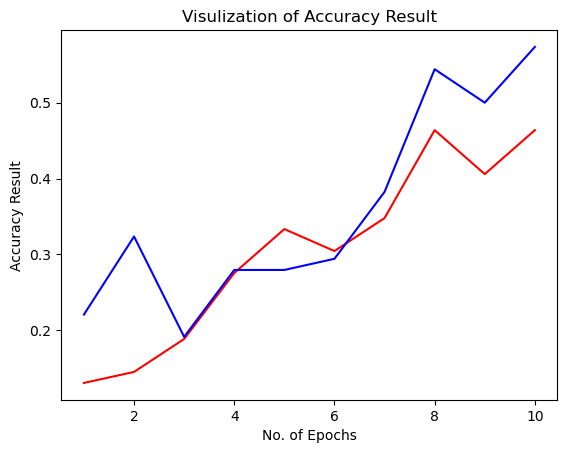

In [236]:
epochs = [i for i in range(1 , 11)]
plt.plot(epochs , training_history.history['accuracy'] , color = 'red' , label = 'Training Accuracy')
plt.plot(epochs , training_history.history['val_accuracy'] , color = 'blue' , label = 'Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visulization of Accuracy Result")
plt.show()

## Some Other Metrics For Model Evaluation

In [238]:
class_name = validation_set.class_names
class_name

['Tomato Early Blight Leaf Without Background',
 'Tomato Leaf Bacterial Spot Without Background',
 'Tomato Leaf Late Blight Without Background',
 'Tomato Leaf Mosaic Virus Without Background',
 'Tomato Leaf Without Background',
 'Tomato Leaf Yellow Virus Without Background',
 'Tomato Mold Leaf Without Background',
 'Tomato Septoria Leaf Spot Without Background']

In [239]:
test_set = tf.keras.utils.image_dataset_from_directory(
    r'Tomato_Dataset\Plant_Diseases\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

NotFoundError: Could not find directory Tomato_Dataset\Plant_Diseases\valid

In [ ]:
y_pred = model.predict(test_set)
y_pred , y_pred.shape

In [ ]:
predicted_categories = tf.argmax(y_pred , axis = 1)
predicted_categories

In [ ]:
true_categories = tf.concat([y for x , y in test_set] ,axis = 0)
true_categories

In [ ]:
Y_true = tf.argmax(true_categories , axis = 1)
Y_true

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(Y_true , predicted_categories , target_names = class_name))

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_true , predicted_categories)
cm

In [ ]:
cm.shape

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Class", fontsize=20)
plt.ylabel("Actual Class", fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix", fontsize=20)
plt.show()

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Create a ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_name)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(30, 15))
disp.plot(ax=ax)

# Rotate x-axis labels
plt.xticks(rotation=60)  # Set the angle for the x-axis labels

# Show the plot
plt.show()

# Visualization Single Image of Test set

In [ ]:
import cv2
import matplotlib.pyplot as plt

image_path = r"Tomato_Dataset\Plant_Diseases\valid\Tomato___healthy\ed6f80a2-c69f-4d33-ad3d-ef2186aa1db1___RS_HL 9669.jpg"

img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()


### Testing Model

In [ ]:
import numpy as np

# Load and preprocess the image
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])

print(input_arr.shape)


In [ ]:
prediction = model.predict(input_arr)
prediction,prediction.shape

In [ ]:
result_index = np.argmax(prediction)
result_index

In [ ]:
# Assuming class_name is a list of class labels
model_prediction = class_name[result_index]  # Use indexing instead of calling as a function

# Displaying the result
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")  # Use f-string for better formatting
plt.xticks([])
plt.yticks([])
plt.show()
